In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from nanowire.optics.simulate import Simulator
from nanowire.optics.postprocess import Simulation
from nanowire.optics.utils.utils import setup_sim
from nanowire.optics.utils.config import Config
from nanowire.optics.utils.geometry import *
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

In [8]:
conf = Config('numpytest.yml')
sim = Simulator(conf)
sim.setup()
sim.get_layers()

In [9]:
print("E numpy")
E, H = sim.s4.GetFieldsOnGridNumpy(z=.35, NumSamples=(200, 150))
print(E.flags)
print(E.shape)
print("E tuple")
Etup, Htup = sim.s4.GetFieldsOnGrid(z=.35, NumSamples=(200, 150), Format='Array')
Et = np.array(Etup)
Ht = np.array(Htup)
print(Et.flags)
print(Et.shape)
np.all(np.isclose(E, Et))

E numpy
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
(150, 200, 3)
E tuple
  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False
(150, 200, 3)


True

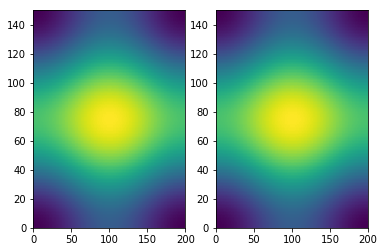

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.pcolormesh(np.abs(E[:, :, 0]))
ax2.pcolormesh(np.abs(Et[:, :, 0]))
plt.show()

In [10]:
E = sim.compute_fields_on_plane(.35, 200, 150, numpy=True)

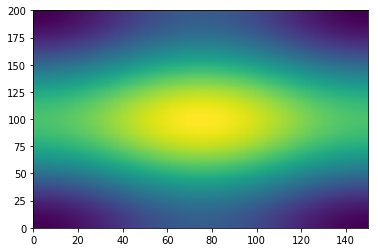

In [15]:
plt.figure()
plt.pcolormesh(np.abs(E[0]))
plt.show()

In [ ]:
E = sim.compute_fields_on_plane(.35, 200, 150, numpy=False)

In [ ]:
Enx, Eny, Enz, Hnx, Hny, Hnz = sim.compute_fields_on_plane(.35, 200, 150, numpy=True)
Etx, Ety, Etz, Htx, Hty, Htz  = sim.compute_fields_on_plane(.35, 200, 150, numpy=False)
print(Enx.shape)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(np.abs(Enx))
ax2.imshow(np.abs(Etx))
plt.show()

In [ ]:
print(np.all(np.isclose(Enx, Etx)))
print(np.all(np.isclose(Eny, Ety)))
print(np.all(np.isclose(Enz, Etz)))

In [ ]:
dx = .25/50
xvals = np.arange(0, .25, dx)
print(xvals)
Exp, Eyp, Ezp, Hxp, Hyp, Hzp = sim.compute_fields_at_point(0, xvals[1], .35)

In [ ]:
print(Enx[0, 1] - Exp)
print(Etx[0, 1] - Exp)
print(Eny[0, 1] - Eyp)
print(Ety[0, 1] - Eyp)
print(Enz[0, 1] - Ezp)
print(Etz[0, 1] - Ezp)